In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(8,8))

import json

import pandas as pd


In [2]:
data_filename = "../CAMHDA301-20160101T000000Z.json"

with open(data_filename) as data_file:    
    j = json.load(data_file)


In [4]:
frame_num = [ f["frameNum"] for f in j["stats"]]
similarities = [ f["similarity"] for f in j["stats"] ]

stats = pd.DataFrame(similarities, index=frame_num).sort_index()

print(stats)

      center  duration_us  flowScale  fromFrame  imgScale similarity  toFrame  \
0        NaN      1109389        NaN        NaN       NaN        NaN      NaN   
10       NaN      1147845        NaN        NaN       NaN        NaN      NaN   
20       NaN      1046167        NaN        NaN       NaN        NaN      NaN   
30       NaN       954498        NaN        NaN       NaN        NaN      NaN   
40       NaN       980457        NaN        NaN       NaN        NaN      NaN   
50       NaN       992173        NaN        NaN       NaN        NaN      NaN   
60       NaN      1029088        NaN        NaN       NaN        NaN      NaN   
70       NaN       983470        NaN        NaN       NaN        NaN      NaN   
80       NaN       854369        NaN        NaN       NaN        NaN      NaN   
90       NaN       964486        NaN        NaN       NaN        NaN      NaN   
100      NaN       854234        NaN        NaN       NaN        NaN      NaN   
110      NaN       758078   

In [35]:
valid = stats[ stats.valid == True ]

# Break the similarity structure out into columns
#similarity = pd.DataFrame.from_records( valid.similarity, valid.index )

## Convert center columns to center_x, center_y
valid = pd.concat( [valid.center.apply( pd.Series ), valid.drop('center', axis=1)], axis=1) \
            .rename( columns={ 0: 'center_x', 1: 'center_y '} )

valid = pd.concat( [valid.similarity.apply( pd.Series ), valid.drop('similarity', axis=1)], axis=1) \
            .rename( columns={ 0: 'scale', 1: 'theta', 2: 'trans_x', 3: 'trans_y'} )

valid['trans'] = valid.trans_x**2 + valid.trans_y**2

print(valid)


          scale  theta    trans_x     trans_y  center_x  center_y   \
570    0.731437    0.0  12.948994  125.998144    -960.0     -540.0   
580    0.998144    0.0  -0.259867    0.037775    -960.0     -540.0   
590    0.999561    0.0  -0.008649   -0.003345    -960.0     -540.0   
600    0.999436    0.0  -0.027887   -0.050824    -960.0     -540.0   
610    0.999774    0.0   0.002541   -0.031326    -960.0     -540.0   
620    0.999830    0.0   0.002202   -0.020548    -960.0     -540.0   
630    0.999853    0.0  -0.005029   -0.018303    -960.0     -540.0   
640    1.000020    0.0  -0.002134    0.006261    -960.0     -540.0   
650    1.000037    0.0   0.009089    0.005455    -960.0     -540.0   
660    0.999859    0.0   0.001965    0.004695    -960.0     -540.0   
670    1.000009    0.0   0.001418    0.022581    -960.0     -540.0   
680    1.000041    0.0  -0.002835    0.005910    -960.0     -540.0   
690    0.999940    0.0  -0.000410   -0.006389    -960.0     -540.0   
700    0.999991    0

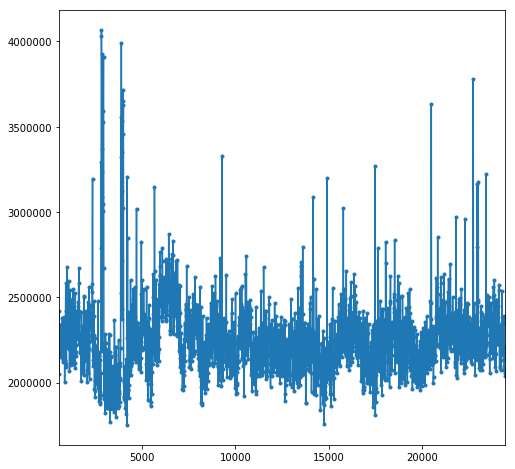

In [6]:

valid.duration_us.plot(style='.-')

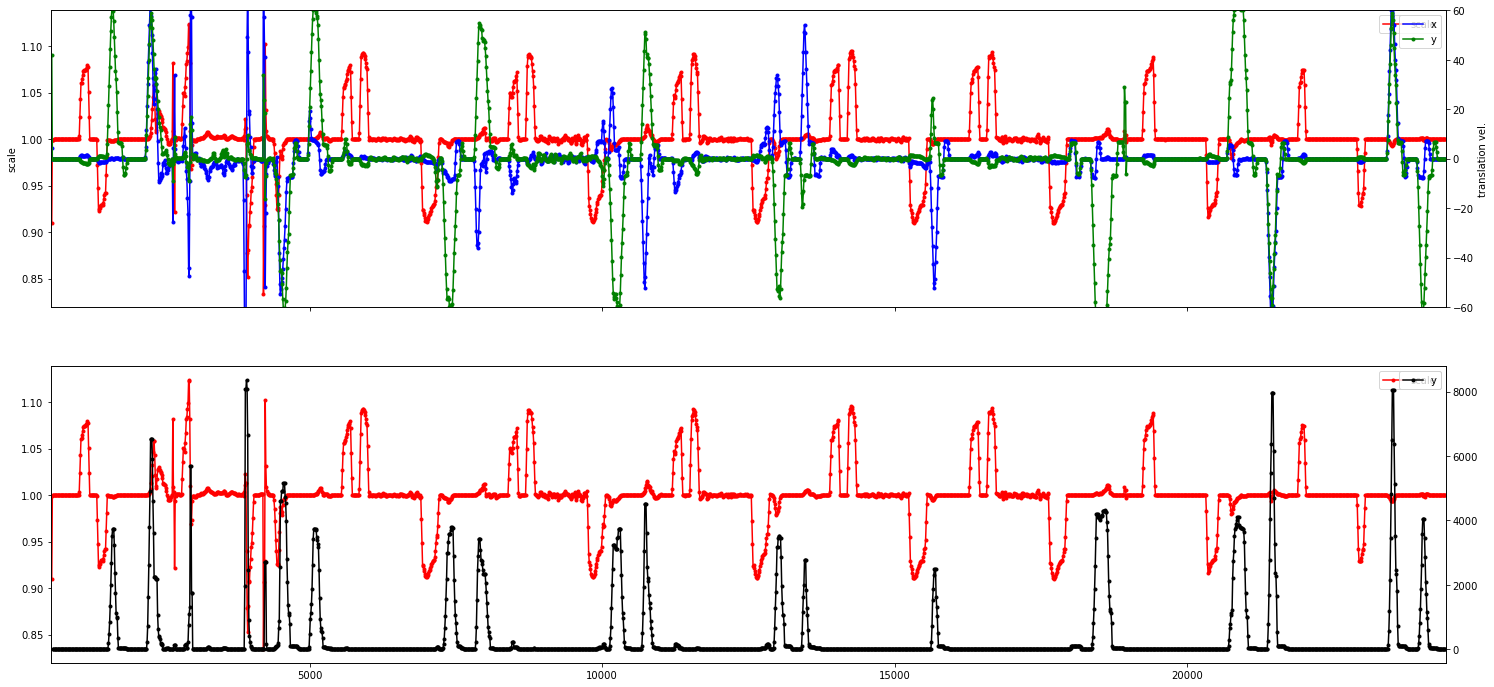

In [45]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(25,12))
raxes = axes[0].twinx()

valid.scale.rolling(window=3,center=False).mean().plot(style='r.-', ax=axes[0], label='scale', legend=True)
axes[0].set_ylabel('scale')
valid.trans_x.rolling(window=3,center=False).mean().plot(style='b.-', ax=raxes, ylim=[-60,60], label='x', legend=True)
raxes.set_ylabel('translation vel.')
valid.trans_y.rolling(window=3,center=False).mean().plot(style='g.-', ax=raxes, ylim=[-60,60], label='y', legend=True)


raxes = axes[1].twinx()
valid.scale.rolling(window=3,center=False).mean().plot(style='r.-', ax=axes[1], label='scale', legend=True)
valid.trans.rolling(window=5,center=False).median().plot(style='k.-', ax=raxes, label='y', legend=True)



In [53]:
stable = valid.loc[lambda df: df.trans > 500].loc[ lambda df: (df.scale-1).abs() > 0.02 ]
print(stable)

          scale  theta     trans_x     trans_y  center_x  center_y   \
570    0.731437    0.0   12.948994  125.998144    -960.0     -540.0   
2290   1.020603    0.0   51.564752   57.071721    -960.0     -540.0   
2300   1.031300    0.0   42.543216   52.933369    -960.0     -540.0   
2310   1.044521    0.0   34.773500   48.967599    -960.0     -540.0   
2320   1.062007    0.0   21.054173   42.485025    -960.0     -540.0   
2330   1.067584    0.0   16.816940   35.143200    -960.0     -540.0   
2340   1.044379    0.0   28.569832   31.115363    -960.0     -540.0   
2380   1.022469    0.0   18.999031   26.515452    -960.0     -540.0   
2390   1.027228    0.0    7.191948   23.763447    -960.0     -540.0   
2660   1.243025    0.0  -75.661860  -26.977099    -960.0     -540.0   
2670   0.782513    0.0   89.240793   20.247337    -960.0     -540.0   
2910   1.103818    0.0  -27.051422   -4.620988    -960.0     -540.0   
2920   1.110830    0.0  -32.555180   -4.605052    -960.0     -540.0   
2930  